In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import datetime 

In [ ]:
PATH_METADATA = "/content/drive/MyDrive/HCYHI/Compliance_Updated/Compliance_Compliance metadata.xlsx"
PATH_DATASET1 = "/content/drive/MyDrive/HCYHI/Compliance_Updated/Compliance_ProblemStatement_Compliance_mockdatasets_02 (1).csv"
PATH_DATASET2 = "/content/drive/MyDrive/HCYHI/Compliance_Updated/Compliance_ProblemStatement_Compliance_mockdatasets_03.xlsx"


In [ ]:
# Convert the excel data to dataframe
METADATA = pd.read_excel(PATH_METADATA, sheet_name=0,header=0,index_col=False,keep_default_na=True)
DATASET1 = pd.read_csv(PATH_DATASET1)
DATASET2 = pd.read_excel(PATH_DATASET2, sheet_name=0,header=0,index_col=False,keep_default_na=True)

In [ ]:
METADATA

,Unnamed: 0,Metadata Transaction Set 1,Unnamed: 2
0,NaN,NaN,NaN
1,No,Column Name,Description
2,1,Customer,Customer identifier
3,2,Age,Age of the customer
4,3,Gender,Gender
5,4,zipcodeOri,Customer zip code
6,5,Merchant,Merchant identifier
7,6,zipMerchant,Merchant location via zip code
8,7,category,Type of transaction
9,8,amount,Amount transferred


In [ ]:
df1 = DATASET1
df2 = DATASET2

In [ ]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df2.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,datetime,nationality
0,0,'C1093826151',33,'M',41150,'M348934600',18000,'es_transportation',4.55,0,29/08/2020 07:00:58,Malaysia
1,0,'C352968107',20,'M',71050,'M348934600',96000,'es_transportation',39.68,0,01/07/2020 21:35:54,Malaysia
2,0,'C2054744914',28,'F',25200,'M1823072687',8200,'es_transportation',26.89,0,25/07/2020 02:15:43,Malaysia
3,0,'C1760612790',47,'M',94700,'M348934600',33000,'es_transportation',17.25,0,07/06/2020 07:48:23,Malaysia
4,0,'C757503768',26,'M',81000,'M348934600',78300,'es_transportation',35.72,0,23/01/2020 06:46:37,Malaysia


In [ ]:
df1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df2.isnull().sum()

step            0
customer        0
age             0
gender          0
zipcodeOri     20
merchant        0
zipMerchant    16
category        0
amount          0
fraud           0
datetime        0
nationality     0
dtype: int64

In [ ]:
# Decrease the dataset size to reduce the memory usage

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df


In [ ]:
df1 = reduce_mem_usage(df1)
df2 = reduce_mem_usage(df2)

Mem. usage decreased to 291.26 Mb (45.5% reduction)
Mem. usage decreased to 39.70 Mb (27.1% reduction)


In [ ]:
# Function to get a rough overview of the data initially
# Which gives more detail compared to df.describe() or df.info()

def summary_table(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary


In [ ]:
summary_table(df1)[:12]

Dataset Shape: (6362620, 11)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,step,int16,0,743,1,1,1,7.97
1,type,object,0,5,PAYMENT,PAYMENT,TRANSFER,1.89
2,amount,float32,0,5236933,9839.64,1864.28,181,22.20
3,nameOrig,object,0,6353307,C1231006815,C1666544295,C1305486145,22.60
4,oldbalanceOrg,float32,0,1834373,170136,21249,181,13.55
5,newbalanceOrig,float32,0,2663280,160296,19384.7,0,10.21
6,nameDest,object,0,2722362,M1979787155,M2044282225,C553264065,20.24
7,oldbalanceDest,float32,0,3532215,0,0,0,13.48
8,newbalanceDest,float32,0,3474507,0,0,0,14.31
9,isFraud,int8,0,2,0,0,1,0.01


## Target Distribution

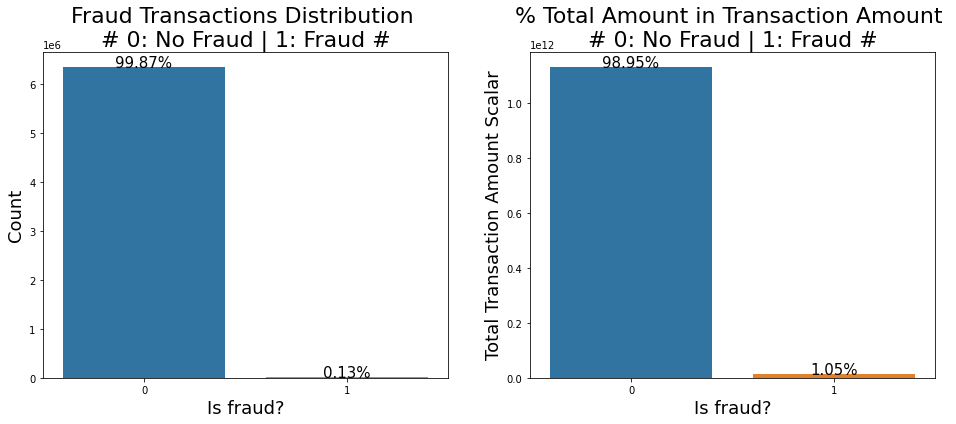

In [ ]:
df1['TransactionAmount'] = df1['amount'].astype(float)
total = len(df1)
total_amt = df1.groupby(['isFraud'])['TransactionAmount'].sum().sum()
plt.figure(figsize=(16,6))

plt.subplot(121)
g = sns.countplot(x='isFraud', data=df1, )
g.set_title("Fraud Transactions Distribution \n# 0: No Fraud | 1: Fraud #", fontsize=22)
g.set_xlabel("Is fraud?", fontsize=18)
g.set_ylabel('Count', fontsize=18)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 

perc_amt = (df1.groupby(['isFraud'])['TransactionAmount'].sum())
perc_amt = perc_amt.reset_index()
plt.subplot(122)
g1 = sns.barplot(x='isFraud', y='TransactionAmount',  dodge=True, data=perc_amt)
g1.set_title("% Total Amount in Transaction Amount \n# 0: No Fraud | 1: Fraud #", fontsize=22)
g1.set_xlabel("Is fraud?", fontsize=18)
g1.set_ylabel('Total Transaction Amount Scalar', fontsize=18)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_amt * 100),
            ha="center", fontsize=15) 
    
plt.show()


### The dataset is heavily skewed as we can see that 0.13% of the transactions are classified as frauds 

### % Total amount in shows that the number of frauds is very skewed as well 

### Quantiles of the Transaction Amount 

In [ ]:
df1['TransacitionAmount'] = df1['TransactionAmount'].astype(float)
print("Transaction Amounts Quantiles:")
print(df1['TransactionAmount'].quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99]))

Transaction Amounts Quantiles:
0.010    4.494676e+02
0.025    1.115775e+03
0.100    4.501300e+03
0.250    1.338957e+04
0.500    7.487194e+04
0.750    2.087215e+05
0.900    3.654233e+05
0.975    8.566034e+05
0.990    1.615980e+06
Name: TransactionAmount, dtype: float64


In [ ]:
df1['TransacitionAmount'].unique()

array([9.83963965e+03, 1.86428003e+03, 1.81000000e+02, ...,
       3.39682125e+05, 6.31140950e+06, 8.50002500e+05])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


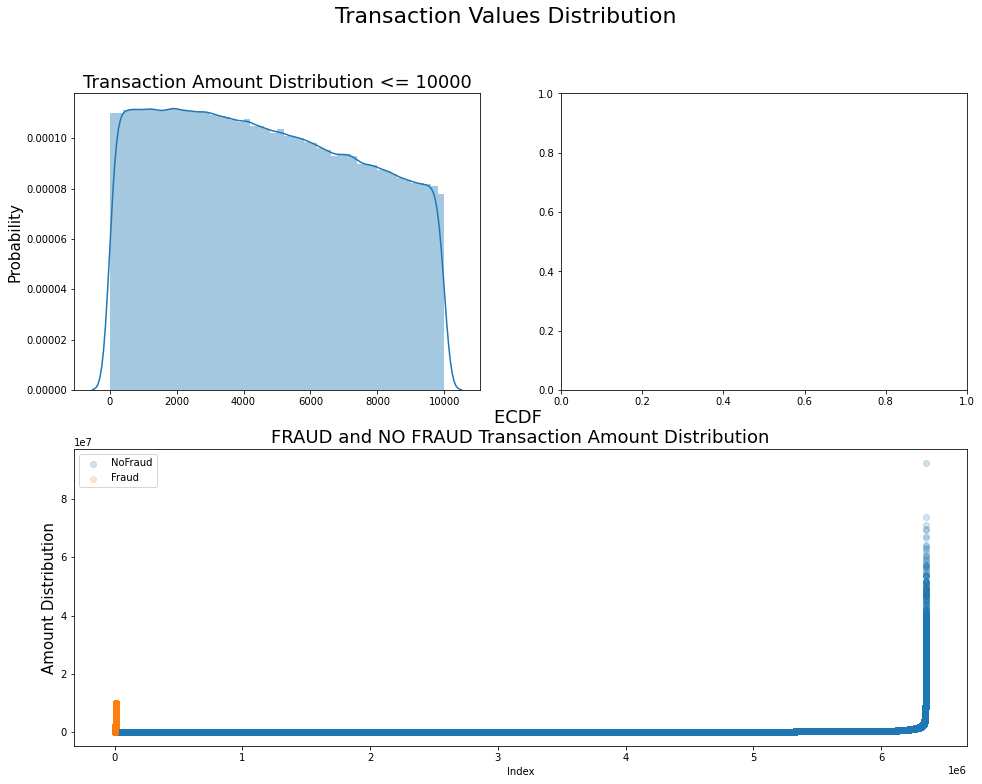

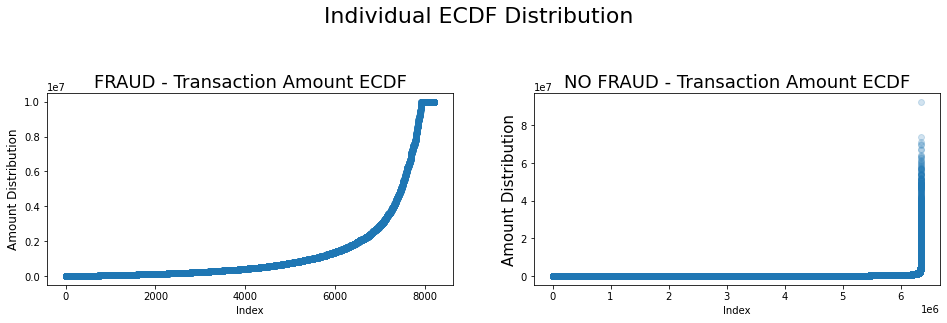

In [ ]:
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
g = sns.distplot(df1[df1['TransactionAmount'] <= 10000]['TransactionAmount'])
g.set_title("Transaction Amount Distribution <= 10000", fontsize=18)
g.set_xlabel("")
g.set_ylabel("Probability", fontsize=15)

plt.subplot(222)

# g1 = sns.distplot(np.log(df1['TransactionAmount']))
# g1.set_title("Transaction Amount (Log) Distribuition", fontsize=18)
# g1.set_xlabel("")
# g1.set_ylabel("Probability", fontsize=15)

# plt.figure(figsize=(16,12))

plt.subplot(212)
g4 = plt.scatter(range(df1[df1['isFraud'] == 0].shape[0]),
                 np.sort(df1[df1['isFraud'] == 0]['TransactionAmount'].values), 
                 label='NoFraud', alpha=.2)
g4 = plt.scatter(range(df1[df1['isFraud'] == 1].shape[0]),
                 np.sort(df1[df1['isFraud'] == 1]['TransactionAmount'].values), 
                 label='Fraud', alpha=.2)
g4= plt.title("ECDF \nFRAUD and NO FRAUD Transaction Amount Distribution", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("Amount Distribution", fontsize=15)
g4 = plt.legend()

plt.figure(figsize=(16,12))

plt.subplot(321)
g = plt.scatter(range(df1[df1['isFraud'] == 1].shape[0]), 
                 np.sort(df1[df1['isFraud'] == 1]['TransactionAmount'].values), 
                label='isFraud', alpha=.4)
plt.title("FRAUD - Transaction Amount ECDF", fontsize=18)
plt.xlabel("Index")
plt.ylabel("Amount Distribution", fontsize=12)

plt.subplot(322)
g1 = plt.scatter(range(df1[df1['isFraud'] == 0].shape[0]),
                 np.sort(df1[df1['isFraud'] == 0]['TransactionAmount'].values), 
                 label='NoFraud', alpha=.2)
g1= plt.title("NO FRAUD - Transaction Amount ECDF", fontsize=18)
g1 = plt.xlabel("Index")
g1 = plt.ylabel("Amount Distribution", fontsize=15)

plt.suptitle('Individual ECDF Distribution', fontsize=22)

plt.show()

### Quantiles of Fraud vs No Fraud 

In [ ]:
print(pd.concat([df1[df1['isFraud'] == 1]['TransactionAmount']\
                 .quantile([.01, .1, .25, .5, .75, .9, .99])\
                 .reset_index(), 
                 df1[df1['isFraud'] == 0]['TransactionAmount']\
                 .quantile([.01, .1, .25, .5, .75, .9, .99])\
                 .reset_index()],
                axis=1, keys=['Fraud', "No Fraud"]))

  Fraud                   No Fraud                  
  index TransactionAmount    index TransactionAmount
0  0.01      1.842000e+03     0.01      4.492400e+02
1  0.10      3.772099e+04     0.10      4.496356e+03
2  0.25      1.270913e+05     0.25      1.336840e+04
3  0.50      4.414234e+05     0.50      7.468472e+04
4  0.75      1.517772e+06     0.75      2.083648e+05
5  0.90      4.521723e+06     0.90      3.643734e+05
6  0.99      1.000000e+07     0.99      1.586064e+06


In [ ]:
def calculate_outliers(df_num): 

    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]
    
    print('Identified lowest outliers: %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers: %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Total outlier observations: %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations: %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers: ", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    
    return

### Transaction Amount Outliers
i.e. values that are 3x the std from the mean following the Central Limit Theorem, which says that processes under ramdom conditions will have something about 99,7% of its data points laying under 3 standard deviations from the mean following the normal distribution.

### 44k+ outliers with 0.71% of the total rows

In [ ]:
calculate_outliers(df1["TransactionAmount"])

Identified lowest outliers: 0
Identified upper outliers: 44945
Total outlier observations: 44945
Non-outlier observations: 6317675
Total percentual of Outliers:  0.7114


In [ ]:
def ploting_cnt_amt(df, col, lim=2000):
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    
    plt.figure(figsize=(16,14))    
    plt.suptitle(f'{col} Distributions ', fontsize=24)
    
    plt.subplot(211)
    g = sns.countplot( x=col,  data=df, order=list(tmp[col].values))
    gt = g.twinx()
    gt = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                       color='black', legend=False, )
    gt.set_ylim(0,tmp['Fraud'].max()*1.1)
    gt.set_ylabel("%Fraud Transactions", fontsize=16)
    g.set_title(f"Most Frequent {col} values and % Fraud Transactions", fontsize=20)
    g.set_xlabel(f"{col} Category Names", fontsize=16)
    g.set_ylabel("Count", fontsize=17)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    sizes = []
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    g.set_ylim(0,max(sizes)*1.15)
    
    #########################################################################
    perc_amt = (df.groupby(['isFraud',col])['TransactionAmount'].sum() \
                / df.groupby([col])['TransactionAmount'].sum() * 100).unstack('isFraud')
    perc_amt = perc_amt.reset_index()
    perc_amt.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    amt = df.groupby([col])['TransactionAmount'].sum().reset_index()
    perc_amt = perc_amt.fillna(0)
    plt.subplot(212)
    g1 = sns.barplot(x=col, y='TransactionAmount', 
                       data=amt, 
                       order=list(tmp[col].values))
    g1t = g1.twinx()
    g1t = sns.pointplot(x=col, y='Fraud', data=perc_amt, 
                        order=list(tmp[col].values),
                       color='black', legend=False, )
    g1t.set_ylim(0,perc_amt['Fraud'].max()*1.1)
    g1t.set_ylabel("%Fraud Total Amount", fontsize=16)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    g1.set_title(f"{col} by Transactions Total + %of total and %Fraud Transactions", fontsize=20)
    g1.set_xlabel(f"{col} Category Names", fontsize=16)
    g1.set_ylabel("Transaction Total Amount(RM)", fontsize=16)
    g1.set_xticklabels(g.get_xticklabels(),rotation=45)    
    
    for p in g1.patches:
        height = p.get_height()
        g1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total_amt*100),
                ha="center",fontsize=12) 
        
    plt.subplots_adjust(hspace=.4, top = 0.9)
    plt.show()

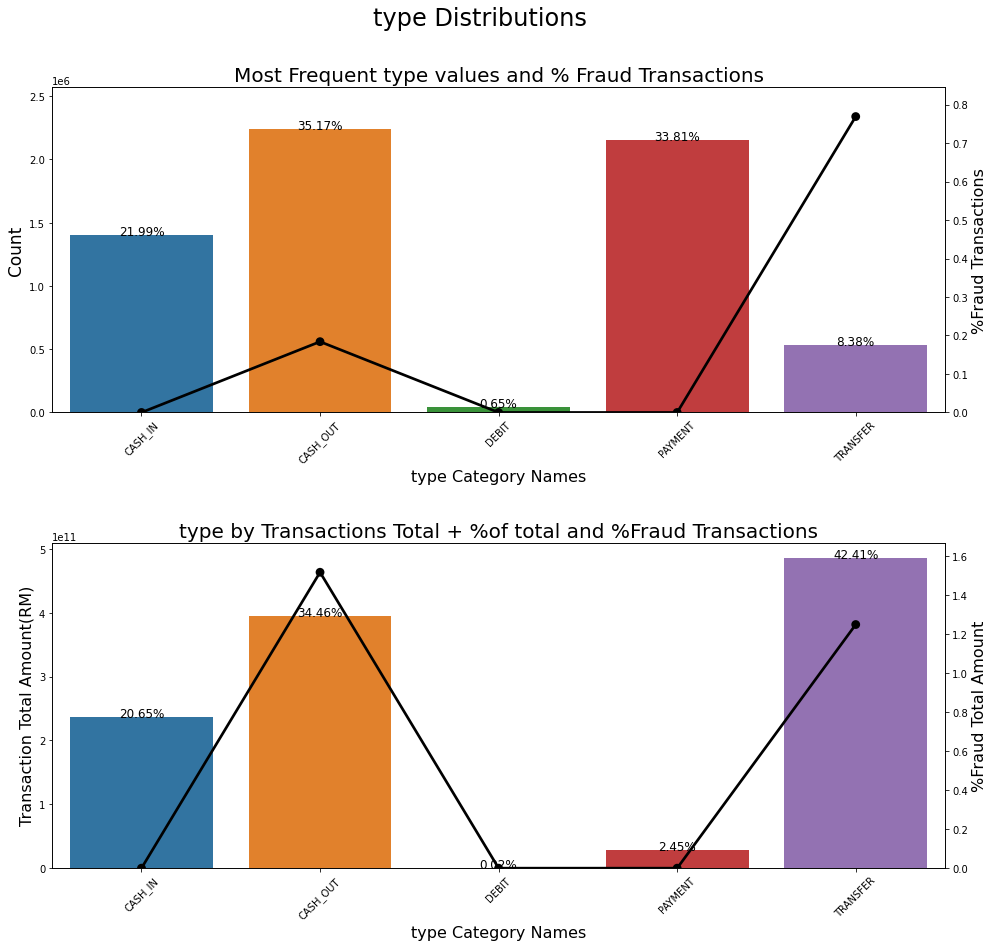

In [ ]:
ploting_cnt_amt(df1, 'type')

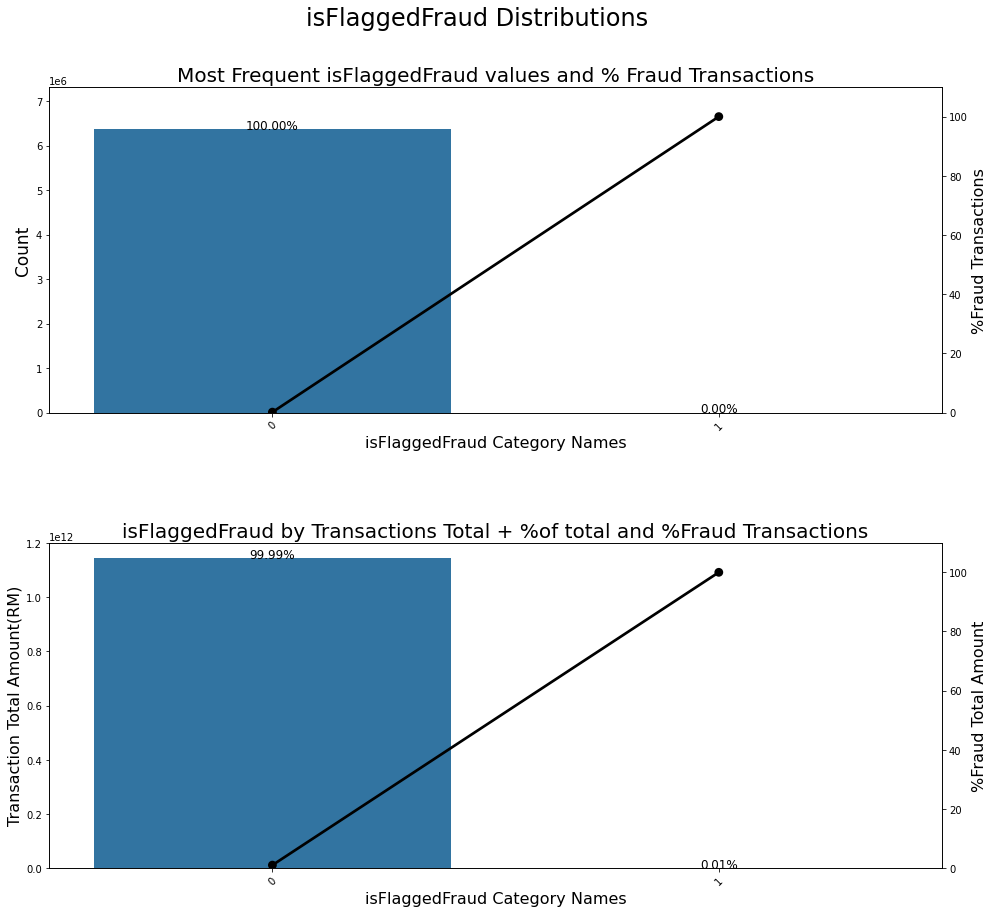

In [ ]:
ploting_cnt_amt(df1, 'isFlaggedFraud')

In [ ]:
summary_table(df2)[:12]

Dataset Shape: (594643, 12)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,step,int16,0,180,0,0,0,7.48
1,customer,object,0,4112,'C1093826151','C352968107','C2054744914',11.92
2,age,int8,0,45,33,20,28,5.48
3,gender,object,0,4,'M','M','F',1.02
4,zipcodeOri,object,20,2779,41150,71050,25200,9.23
5,merchant,object,0,50,'M348934600','M348934600','M1823072687',2.06
6,zipMerchant,object,16,2779,18000,96000,8200,9.23
7,category,object,0,15,'es_transportation','es_transportation','es_transportation',1.06
8,amount,float16,0,7856,4.55078,39.6875,26.8906,12.06
9,fraud,int8,0,2,0,0,0,0.09


In [ ]:
def ploting_cnt_amt2(df, col, lim=2000):
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    
    plt.figure(figsize=(16,14))    
    plt.suptitle(f'{col} Distributions ', fontsize=24)
    
    plt.subplot(211)
    g = sns.countplot( x=col,  data=df, order=list(tmp[col].values))
    gt = g.twinx()
    gt = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                       color='black', legend=False, )
    gt.set_ylim(0,tmp['Fraud'].max()*1.1)
    gt.set_ylabel("%Fraud Transactions", fontsize=16)
    g.set_title(f"Most Frequent {col} values and % Fraud Transactions", fontsize=20)
    g.set_xlabel(f"{col} Category Names", fontsize=16)
    g.set_ylabel("Count", fontsize=17)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    sizes = []
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    g.set_ylim(0,max(sizes)*1.15)
    
    #########################################################################
    perc_amt = (df.groupby(['isFraud',col])['TransactionAmount'].sum() \
                / df.groupby([col])['TransactionAmount'].sum() * 100).unstack('isFraud')
    perc_amt = perc_amt.reset_index()
    perc_amt.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    amt = df.groupby([col])['TransactionAmount'].sum().reset_index()
    perc_amt = perc_amt.fillna(0)
    plt.subplot(212)
    g1 = sns.barplot(x=col, y='TransactionAmount', 
                       data=amt, 
                       order=list(tmp[col].values))
    g1t = g1.twinx()
    g1t = sns.pointplot(x=col, y='Fraud', data=perc_amt, 
                        order=list(tmp[col].values),
                       color='black', legend=False, )
    g1t.set_ylim(0,perc_amt['Fraud'].max()*1.1)
    g1t.set_ylabel("%Fraud Total Amount", fontsize=16)
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    g1.set_title(f"{col} by Transactions Total + %of total and %Fraud Transactions", fontsize=20)
    g1.set_xlabel(f"{col} Category Names", fontsize=16)
    g1.set_ylabel("Transaction Total Amount(RM)", fontsize=16)
    g1.set_xticklabels(g.get_xticklabels(),rotation=45)    
    
    for p in g1.patches:
        height = p.get_height()
        g1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total_amt*100),
                ha="center",fontsize=12) 
        
    plt.subplots_adjust(hspace=.4, top = 0.9)
    plt.show()

In [ ]:
# Fill in the missing values 
list_missing = ['zipcodeOri', 'zipMerchant']
df2[list_missing].fillna("Missing")

,zipcodeOri,zipMerchant
0,41150,18000
1,71050,96000
2,25200,8200
3,94700,33000
4,81000,78300
...,...,...
594638,79200,17500
594639,14000,58100
594640,2700,88450
594641,18000,16310


In [ ]:
df2

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,datetime,nationality
0,0,'C1093826151',33,'M',41150,'M348934600',18000,'es_transportation',4.550781,0,29/08/2020 07:00:58,Malaysia
1,0,'C352968107',20,'M',71050,'M348934600',96000,'es_transportation',39.687500,0,01/07/2020 21:35:54,Malaysia
2,0,'C2054744914',28,'F',25200,'M1823072687',8200,'es_transportation',26.890625,0,25/07/2020 02:15:43,Malaysia
3,0,'C1760612790',47,'M',94700,'M348934600',33000,'es_transportation',17.250000,0,07/06/2020 07:48:23,Malaysia
4,0,'C757503768',26,'M',81000,'M348934600',78300,'es_transportation',35.718750,0,23/01/2020 06:46:37,Malaysia
...,...,...,...,...,...,...,...,...,...,...,...,...
594638,179,'C1753498738',56,'F',79200,'M1823072687',17500,'es_transportation',20.531250,0,18/10/2020 15:53:41,Malaysia
594639,179,'C650108285',45,'F',14000,'M1823072687',58100,'es_transportation',50.718750,0,25/06/2020 20:00:45,Singapore
594640,179,'C123623130',57,'F',2700,'M349281107',88450,'es_fashion',22.437500,0,03/03/2020 18:04:03,Malaysia
594641,179,'C1499363341',16,'M',18000,'M1823072687',16310,'es_transportation',14.460938,0,17/09/2020 05:05:00,Singapore


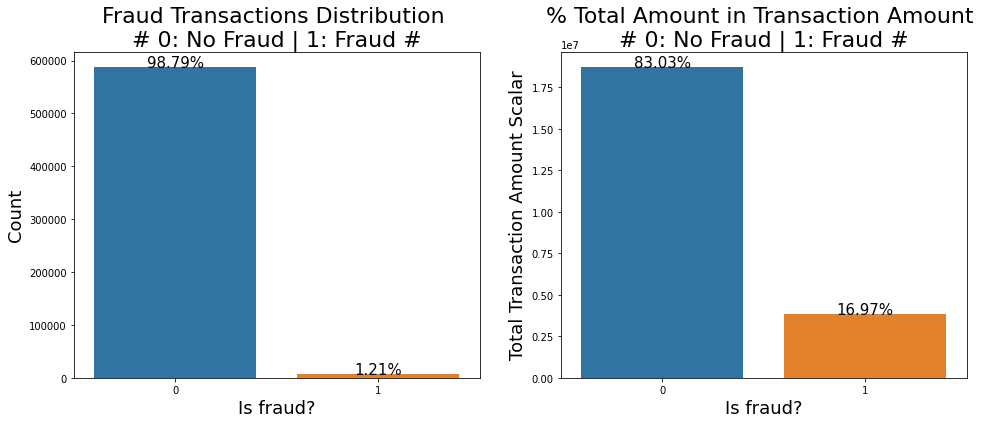

In [ ]:
df2['TransactionAmount'] = df2['amount'].astype("float")
df2['isFraud'] = df2["fraud"]
total = len(df2)
total_amt = df2.groupby(['isFraud'])['TransactionAmount'].sum().sum()
plt.figure(figsize=(16,6))

plt.subplot(121)
g = sns.countplot(x='isFraud', data=df2, )
g.set_title("Fraud Transactions Distribution \n# 0: No Fraud | 1: Fraud #", fontsize=22)
g.set_xlabel("Is fraud?", fontsize=18)
g.set_ylabel('Count', fontsize=18)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=15) 

perc_amt = (df2.groupby(['isFraud'])['TransactionAmount'].sum())
perc_amt = perc_amt.reset_index()
plt.subplot(122)
g1 = sns.barplot(x='isFraud', y='TransactionAmount',  dodge=True, data=perc_amt)
g1.set_title("% Total Amount in Transaction Amount \n# 0: No Fraud | 1: Fraud #", fontsize=22)
g1.set_xlabel("Is fraud?", fontsize=18)
g1.set_ylabel('Total Transaction Amount Scalar', fontsize=18)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total_amt * 100),
            ha="center", fontsize=15) 
    
plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


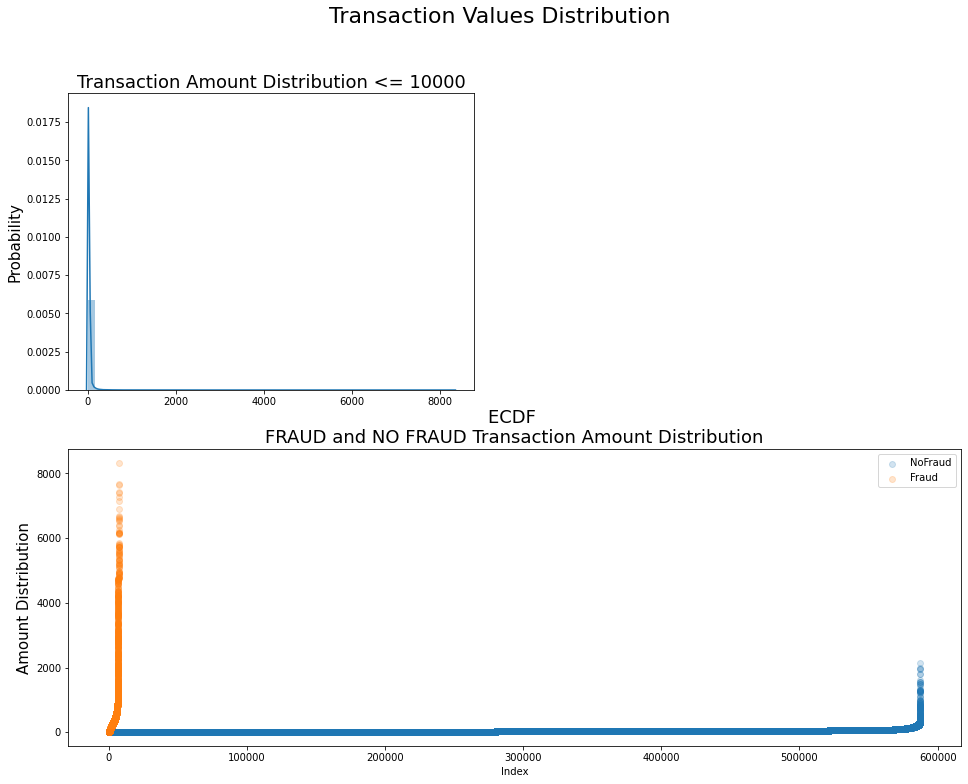

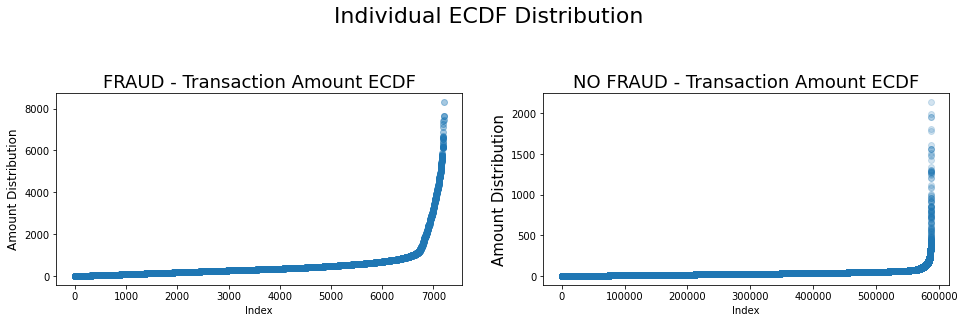

In [ ]:
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Values Distribution', fontsize=22)
plt.subplot(221)
g = sns.distplot(df2[df2['TransactionAmount'] <= 10000]['TransactionAmount'])
g.set_title("Transaction Amount Distribution <= 10000", fontsize=18)
g.set_xlabel("")
g.set_ylabel("Probability", fontsize=15)


plt.subplot(212)
g4 = plt.scatter(range(df2[df2['isFraud'] == 0].shape[0]),
                 np.sort(df2[df2['isFraud'] == 0]['TransactionAmount'].values), 
                 label='NoFraud', alpha=.2)
g4 = plt.scatter(range(df2[df2['isFraud'] == 1].shape[0]),
                 np.sort(df2[df2['isFraud'] == 1]['TransactionAmount'].values), 
                 label='Fraud', alpha=.2)
g4= plt.title("ECDF \nFRAUD and NO FRAUD Transaction Amount Distribution", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("Amount Distribution", fontsize=15)
g4 = plt.legend()

plt.figure(figsize=(16,12))

plt.subplot(321)
g = plt.scatter(range(df2[df2['isFraud'] == 1].shape[0]), 
                 np.sort(df2[df2['isFraud'] == 1]['TransactionAmount'].values), 
                label='isFraud', alpha=.4)
plt.title("FRAUD - Transaction Amount ECDF", fontsize=18)
plt.xlabel("Index")
plt.ylabel("Amount Distribution", fontsize=12)

plt.subplot(322)
g1 = plt.scatter(range(df2[df2['isFraud'] == 0].shape[0]),
                 np.sort(df2[df2['isFraud'] == 0]['TransactionAmount'].values), 
                 label='NoFraud', alpha=.2)
g1= plt.title("NO FRAUD - Transaction Amount ECDF", fontsize=18)
g1 = plt.xlabel("Index")
g1 = plt.ylabel("Amount Distribution", fontsize=15)

plt.suptitle('Individual ECDF Distribution', fontsize=22)

plt.show()

In [ ]:

print(pd.concat([df2[df2['isFraud'] == 1]['TransactionAmount']\
                 .quantile([.01, .1, .25, .5, .75, .9, .99])\
                 .reset_index(), 
                 df2[df2['isFraud'] == 0]['TransactionAmount']\
                 .quantile([.01, .1, .25, .5, .75, .9, .99])\
                 .reset_index()],
                axis=1, keys=['Fraud', "No Fraud"]))

  Fraud                   No Fraud                  
  index TransactionAmount    index TransactionAmount
0  0.01          6.307422     0.01          0.560059
1  0.10         61.437500     0.10          5.511719
2  0.25        160.000000     0.25         13.593750
3  0.50        319.125000     0.50         26.609375
4  0.75        549.000000     0.75         41.890625
5  0.90        901.550000     0.90         58.312500
6  0.99       4776.000000     0.99        153.750000


In [ ]:
calculate_outliers(df2["TransactionAmount"])

Identified lowest outliers: 0
Identified upper outliers: 3188
Total outlier observations: 3188
Non-outlier observations: 591455
Total percentual of Outliers:  0.539


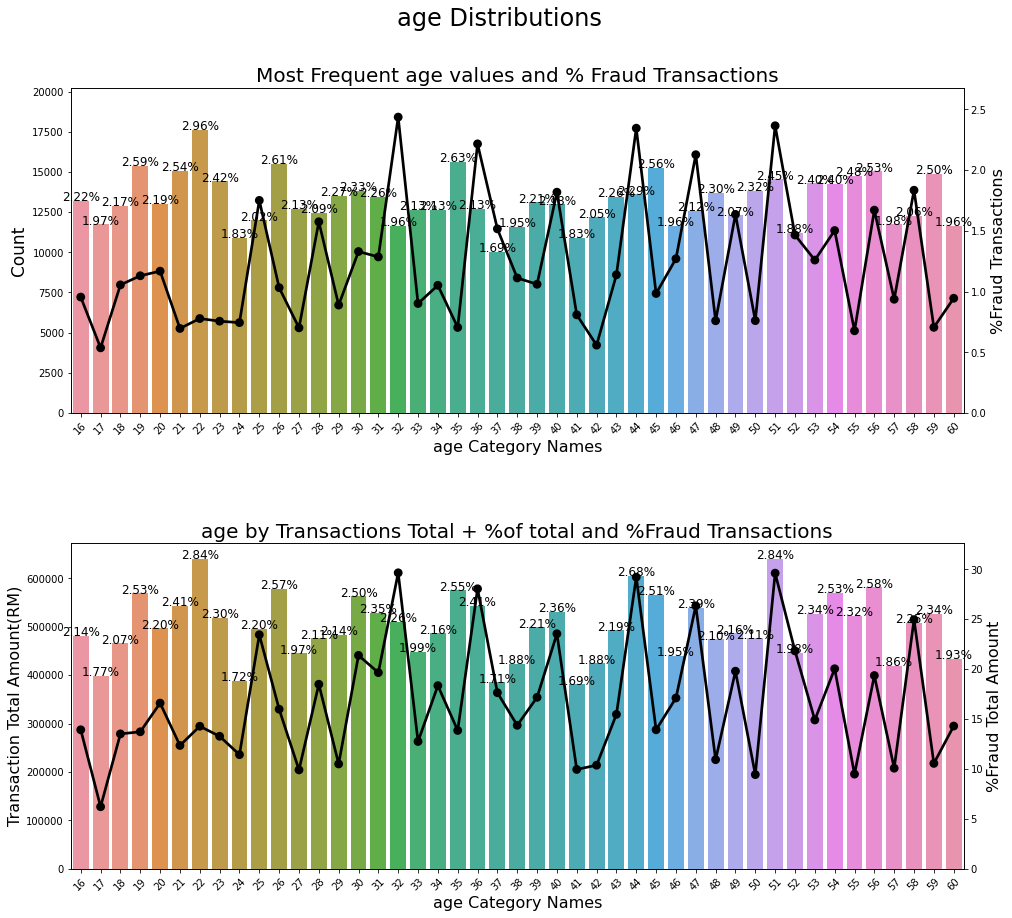

In [ ]:
ploting_cnt_amt(df2, 'age')

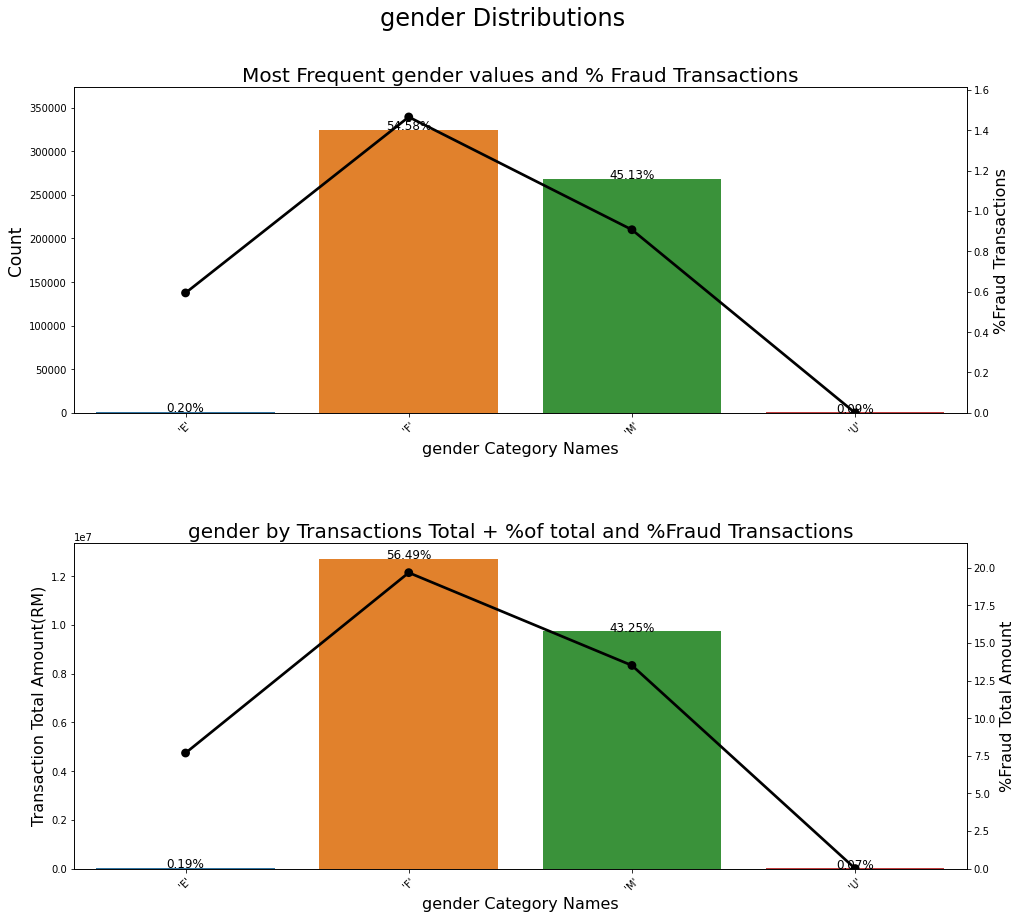

In [ ]:
ploting_cnt_amt(df2, 'gender')

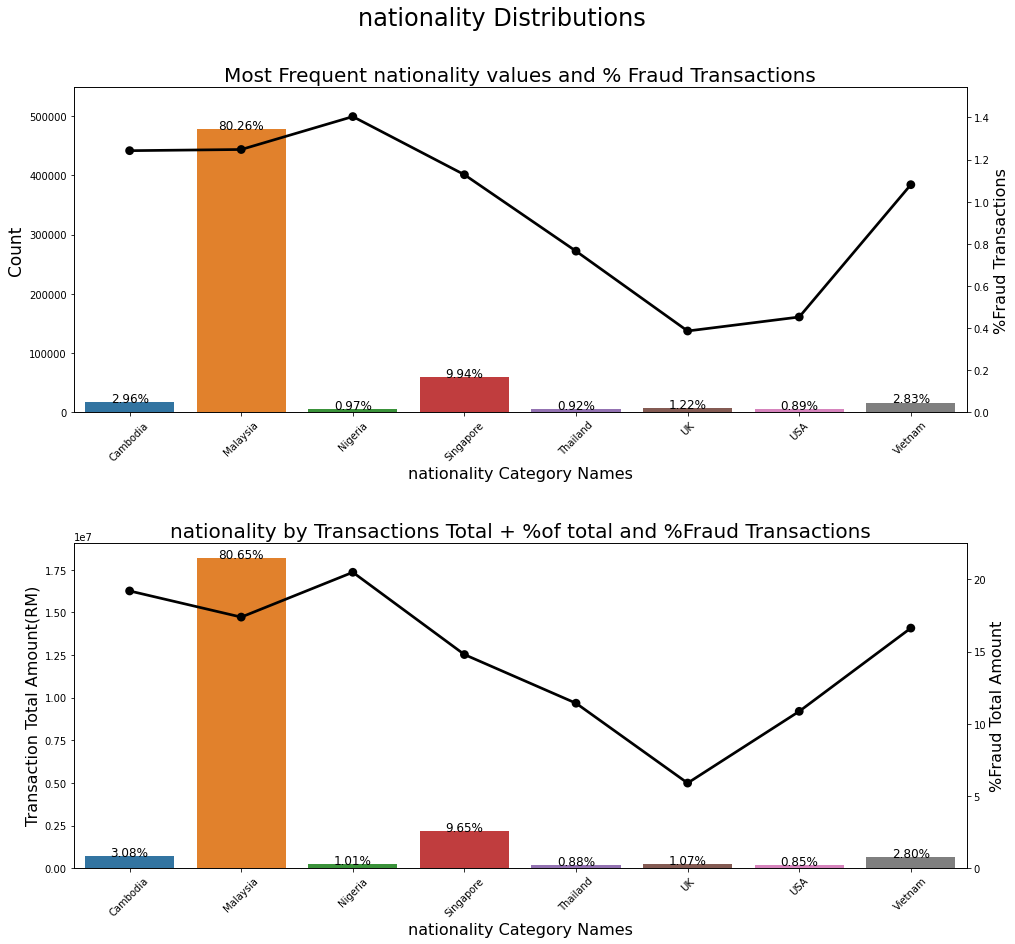

In [ ]:
ploting_cnt_amt(df2, 'nationality')

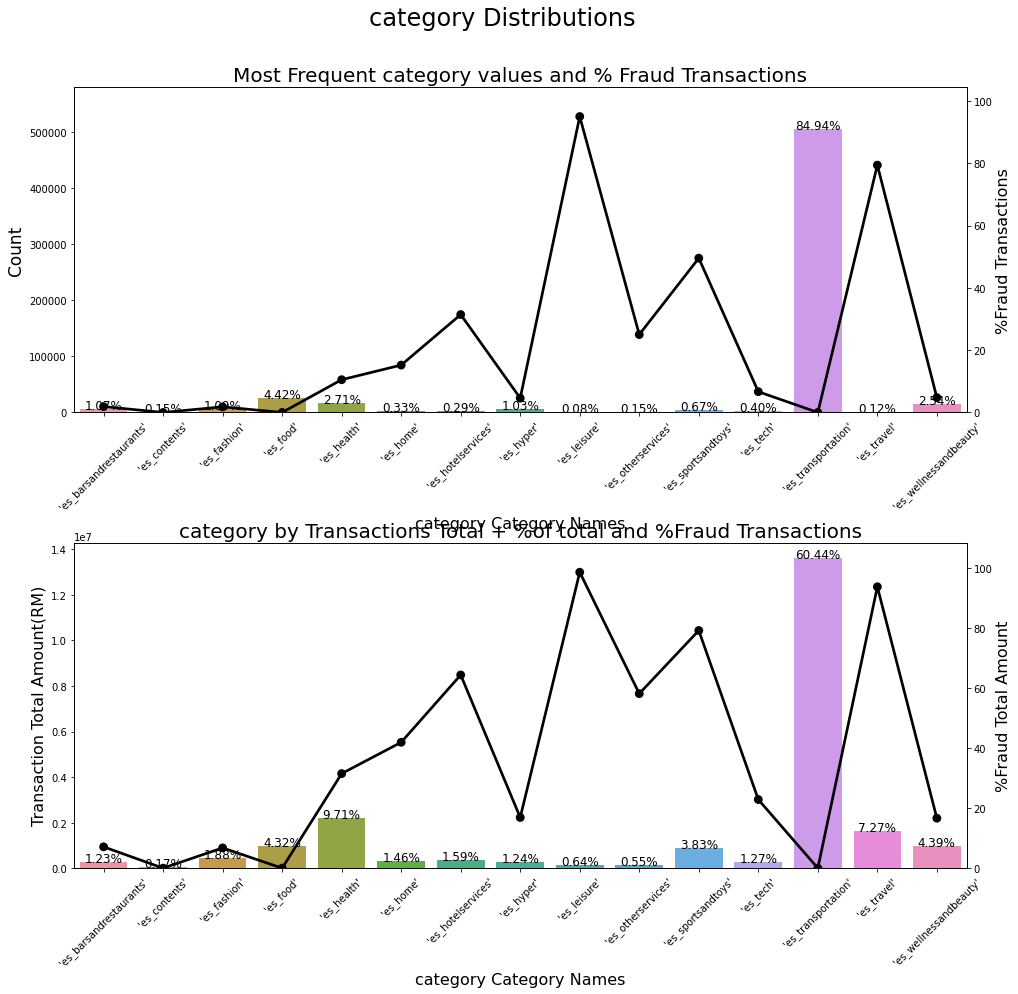

In [ ]:
ploting_cnt_amt(df2, 'category')

In [ ]:
# Plotting the fraud occurrence of time 
df2['datetime'] =  pd.to_datetime(df2['datetime'], infer_datetime_format=True)
df2['_Weekdays'] = df2['datetime'].dt.dayofweek
df2['_Hours'] = df2['datetime'].dt.hour
df2['_Days'] = df2['datetime'].dt.day

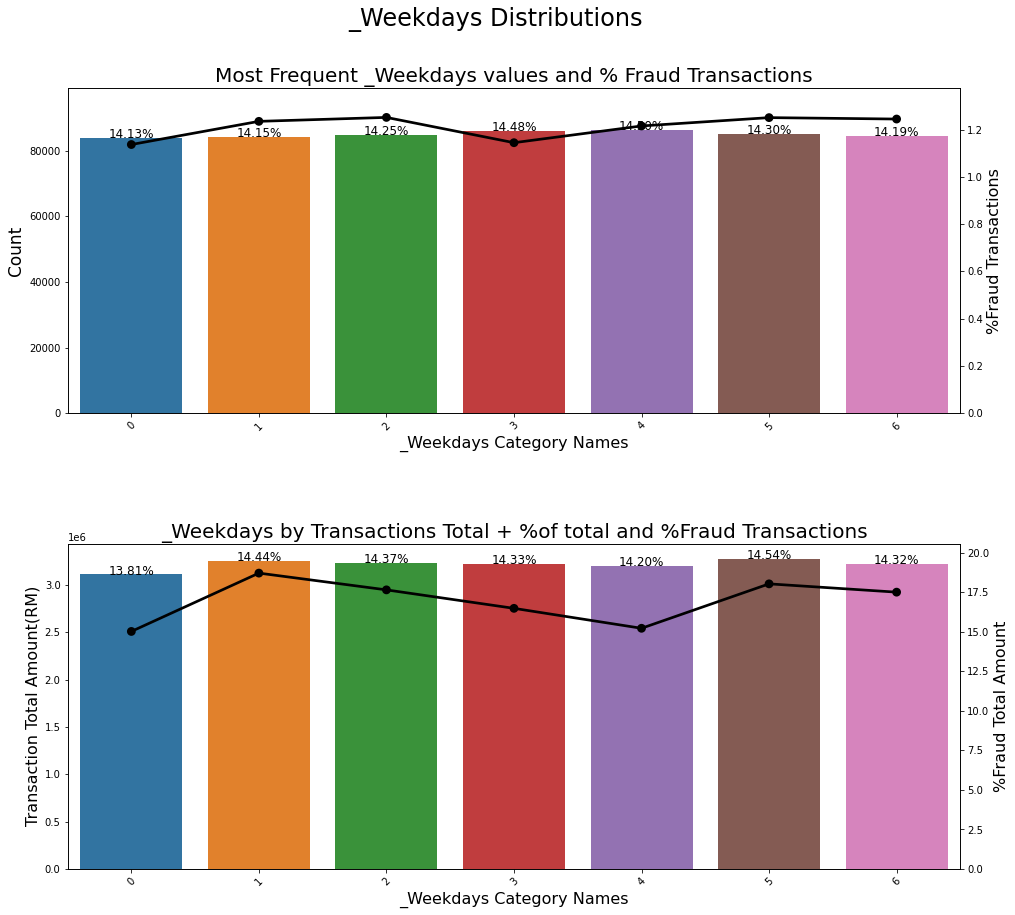

In [ ]:
ploting_cnt_amt2(df2, '_Weekdays')

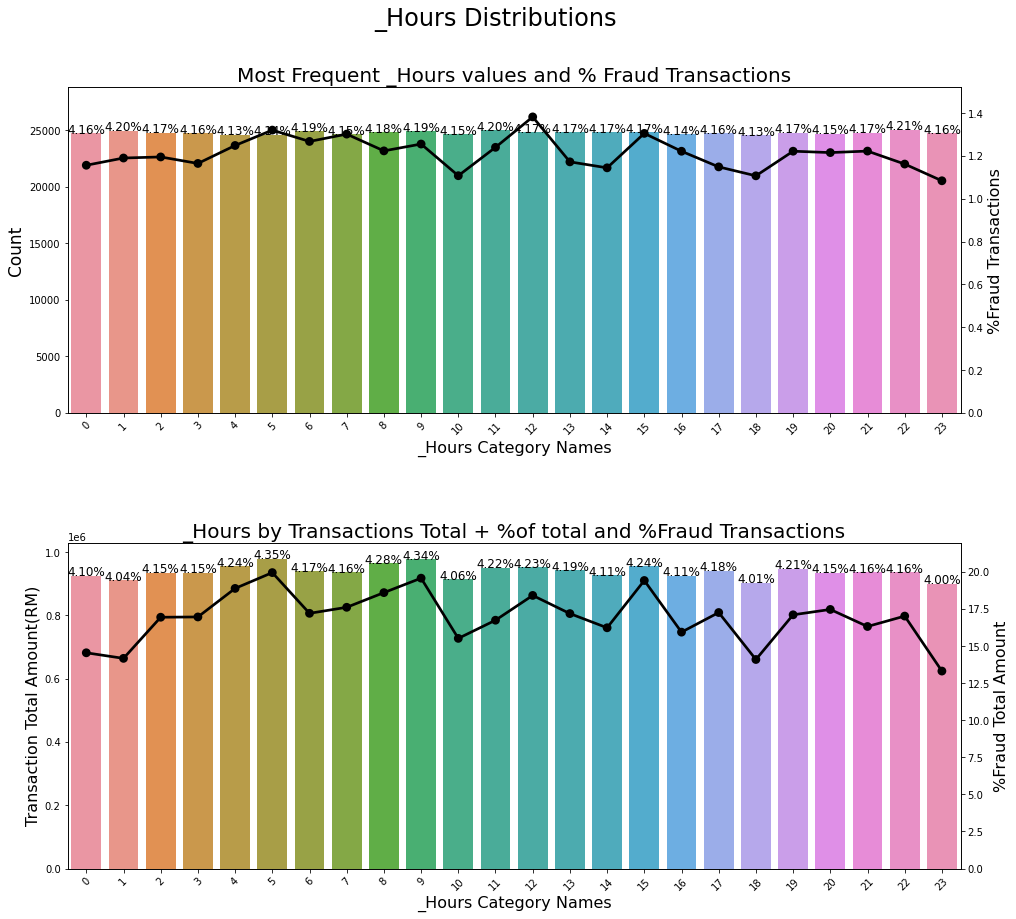

In [ ]:
ploting_cnt_amt2(df2, '_Hours')

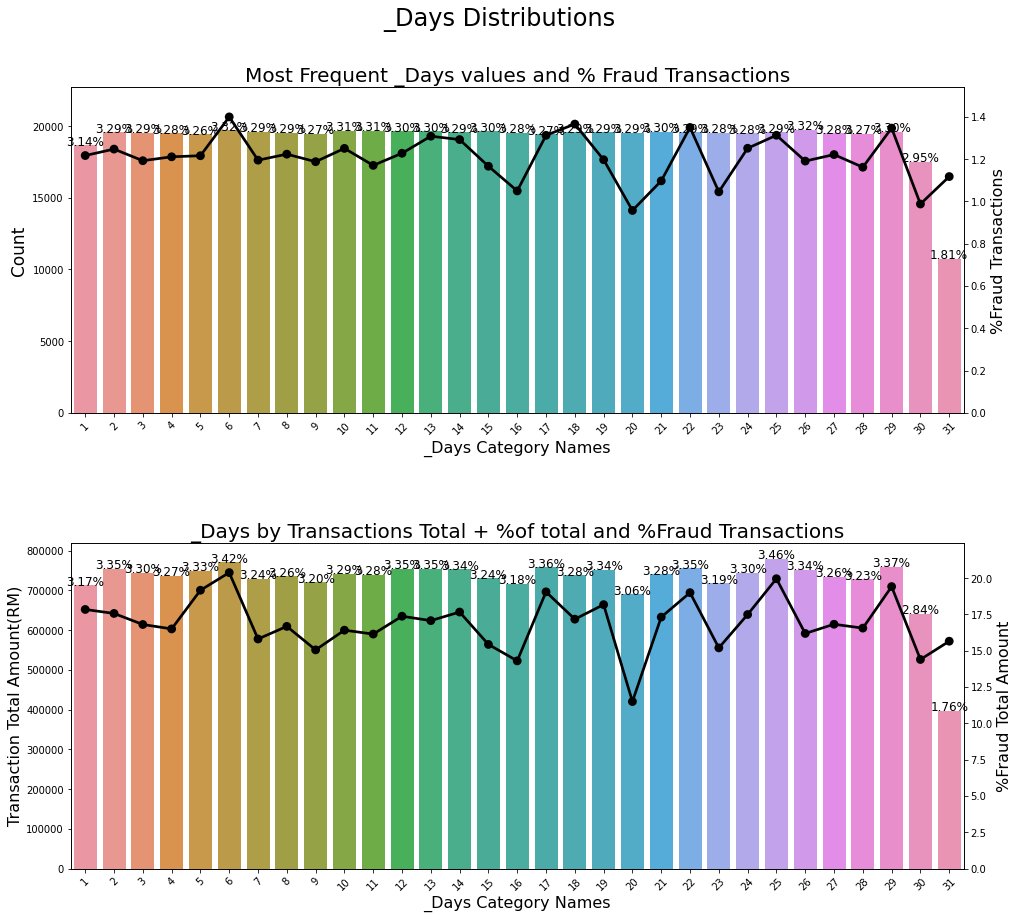

In [ ]:
ploting_cnt_amt2(df2, '_Days')

## Solution: 

Get more data!

- Whether user uses mobile devices
- Whether user uses a laptop 
- What browser are they using?
- IP Address
- email -> age of email account

IEEE Data that can be used here :

### Transaction
ProductCD
emaildomain
cardType 
addr1 and addr2
P_emaildomain 
R_emaildomain

### Identity
DeviceType 
DeviceInfo 
id 

Maybe I can try and combine the two?

Plan is to build a model and showcase the performance with the IEEE dataset vs the given dataset.

Presentation will compare the usefullness of using extra data.

Showcase the need for the API from TrueCaller but mention that you were unable to get a developer pass in order to use the data.

Focus on how you can improve the data with the magic method used in the kaggle example.






## Model training 



In [ ]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,TransactionAmount,TransacitionAmount
0,1,PAYMENT,9839.639648,C1231006815,170136.0,160296.359375,M1979787155,0.0,0.0,0,0,9839.639648,9839.639648
1,1,PAYMENT,1864.280029,C1666544295,21249.0,19384.720703,M2044282225,0.0,0.0,0,0,1864.280029,1864.280029
2,1,TRANSFER,181.000000,C1305486145,181.0,0.000000,C553264065,0.0,0.0,1,0,181.000000,181.000000
3,1,CASH_OUT,181.000000,C840083671,181.0,0.000000,C38997010,21182.0,0.0,1,0,181.000000,181.000000
4,1,PAYMENT,11668.139648,C2048537720,41554.0,29885.859375,M1230701703,0.0,0.0,0,0,11668.139648,11668.139648


In [ ]:
df2.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud,datetime,nationality,TransactionAmount,isFraud,_Weekdays,_Hours,_Days
0,0,'C1093826151',33,'M',41150,'M348934600',18000,'es_transportation',4.550781,0,2020-08-29 07:00:58,Malaysia,4.550781,0,5,7,29
1,0,'C352968107',20,'M',71050,'M348934600',96000,'es_transportation',39.687500,0,2020-07-01 21:35:54,Malaysia,39.687500,0,2,21,1
2,0,'C2054744914',28,'F',25200,'M1823072687',8200,'es_transportation',26.890625,0,2020-07-25 02:15:43,Malaysia,26.890625,0,5,2,25
3,0,'C1760612790',47,'M',94700,'M348934600',33000,'es_transportation',17.250000,0,2020-06-07 07:48:23,Malaysia,17.250000,0,6,7,7
4,0,'C757503768',26,'M',81000,'M348934600',78300,'es_transportation',35.718750,0,2020-01-23 06:46:37,Malaysia,35.718750,0,3,6,23
